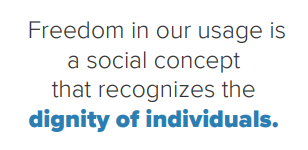

<head><script type='text/javascript'>
  window.smartlook||(function(d) {
    var o=smartlook=function(){ o.api.push(arguments)},h=d.getElementsByTagName('head')[0];
    var c=d.createElement('script');o.api=new Array();c.async=true;c.type='text/javascript';
    c.charset='utf-8';c.src='https://rec.smartlook.com/recorder.js';h.appendChild(c);
    })(document);
    smartlook('init', 'bcac4faee5856588781e3ab707c44b89c4c05dd5');
</script></head>

# Table of Contents
* [Introduction](#Introduction)
* [Data Preparation](#Data-Preparation)
* [Tables: Country Ranking in Human Freedom, Personal Freedom, and Economic Freedom](#Tables)
* [Static Graphs: Regional and National HFi Trends](#Static-Graphs)
* [Dynamic Graphs: A closer look on liberty indices and HFi scoring](#Dynamic-Graphs)
* [References](#References)

<a id='Introduction'></a>
# Introduction

I was browsing global category topics and stumbled upon this Human Freedom Index data. For a while I was at a loss, and it got me thinking... what does *human freedom* mean? What is the essence of it? And how the heck did this dataset measured the 'human freedom' of a country?

As per wiki definition of freedom: 
> **Freedom**, generally, is having the ability to act or change without constraint. . . A person has the freedom to do things *that will not*, in theory or in practice, *be prevented by other forces*.

Apparently, Human Freedom Index (HFI) takes account of civil, personal, political, and economic liberties -- these are broad but reasonable components to help measure the overall meaning of freedom worldwide.

So the aim of this notebook is to inspect the relationship of these liberty indices on HFI scoring, and from there, we'll see what we can make out of it. I will be creating static and dynamic graphs for visualization, mainly using matplotlib, seaborn, and bokeh.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import copy

from bokeh.models import ColumnDataSource, HoverTool, Select, Slider, CustomJS, CategoricalColorMapper, Legend
from bokeh.palettes import Turbo11 as palette
from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

filevar1 = '../input/the-human-freedom-index/hfi_cc_2018.csv'
filevar2 = '../input/the-human-freedom-index/hfi_cc_2019.csv'

try: 
    df_init_2018 = pd.read_csv(filevar1)
    print('File 1 loading - Success!')
    df_init_2019 = pd.read_csv(filevar2)
    print('File 2 loading - Success!')
except:
    print('File loading - Failed!')

<a id='Data-Preparation'></a> 
# Data Preparation

In [ ]:
# check file difference. use csv with latest records.
print(sorted(df_init_2018.year.unique()))
print(sorted(df_init_2019.year.unique()))

We will be using the HFI 2019 csv as it covers 2008 till 2017, which is considered the most recent year with sufficient available data. 

*Note: The column data output is currently hidden. To view, just click the 'Output' button right below this cell.*

In [ ]:
# data information summary
print('Country total:',len(df_init_2019.countries.unique()))
print(df_init_2019.info(verbose=True, null_counts=True))

The dataset contains:
- 162 sampled countries
- 120 variable columns
- period covered: 2008 - 2017

As you can see, there are lots of indicators involved, but I'll only use these items listed below:
1. Rule of Law (pf_rol)
2. Security and Safety (pf_ss)
    - Security and Safety of Women (pf_ss_women)
3. Movement (pf_movement)
    - Foreign movement (pf_movement_foreign)
    - Movement of Women (pf_movement_women)
4. Religion (pf_religion)
5. Association, Assembly, and Civil Society (pf_association)
6. Expression and Information (pf_expression)
    - Press killed for expression (pf_expression_killed)
    - Press jailed for expression (pf_expression_jailed)
    - Expression on internet (pf_expression_internet)
7. Identity and Relationships (pf_identity)
    - Male-to-male relationship (pf_identity_sex_male)
    - Female-to-female relationship (pf_identity_sex_female)
    - Divorce rights (pf_identity_divorce)
8. Size of Government (ef_government)
9. Legal System and Property Rights (ef_legal)
10. Access to Sound Money (ef_money)
    - Inflation rate (ef_money_inflation)
11. Freedom to Trade Internationally (ef_trade)
12. Regulation of Credit, Labor, and Business (ef_regulation)

In [ ]:
# a glimpse on the original dataframe
df_init_2019.head()

Majority of the columns are identified as 'object' dtype, and it indicates that there are no null values. However, the above cell shows '-' on a number of items, but aren't tagged as NaN since it is of object dtype. I'll be cleaning this out and will create a new dataframe with my handpicked indicators.




In [ ]:
df = pd.DataFrame()
df[['year','countries','region']] = df_init_2019[['year',
                                                  'countries',
                                                  'region']]
col_int = ['hf_score','hf_rank','pf_rol','pf_ss',
           'pf_ss_women','pf_movement','pf_movement_foreign',
           'pf_movement_women','pf_religion','pf_association',
           'pf_expression','pf_expression_killed',
           'pf_expression_jailed','pf_expression_internet',
           'pf_identity','pf_identity_sex_male',
           'pf_identity_sex_female','pf_identity_divorce',
           'pf_score','pf_rank','ef_government','ef_legal',
           'ef_money','ef_money_inflation','ef_trade',
           'ef_regulation','ef_score','ef_rank']
df[col_int] = df_init_2019[col_int]
df = df.replace(to_replace = "-", value = 0) 
for i in col_int:
    df[i] = df[i].astype(float).astype(int)

# New Dataframe
df

<a id='Tables'></a>
# Tables: Country Ranking in Human Freedom, Personal Freedom, and Economic Freedom

*Note: Codes are currently hidden. To view, click the 'Code' button below.*


**Country Ranking as per Human Freedom Index Score**

In [ ]:
pd.set_option('display.max_rows', None)
table_rank = df[['year','countries','hf_score','hf_rank',
                 'pf_score','pf_rank','ef_score',
                 'ef_rank']][df['year']==2017]
table_rank.sort_values(by='hf_rank')

**Country Ranking as per Personal Freedom Index Score**

In [ ]:
table_rank.sort_values(by='pf_rank')

**Country Ranking as per Economic Freedom Index Score**

In [ ]:
table_rank.sort_values(by='ef_rank')

<a id='Static-Graphs'></a>
# Static Graphs: Regional and National HFi Trends

In [ ]:
sns.set(font_scale=0.5)
sns.heatmap(data=df.corr(),cmap='BrBG',annot=True,fmt='.2f')
plt.show()

Base on the heatmap above, these are some of my observations:
* Human Freedom Score:
    * Association (Civil Society) and size of government have low correlation on HF score.
    * Freedom to trade, access to sound money, freedom of expression, and security & safety have high correlation on HF score.
    * any Economic Freedom Indicator contributes to a relatively high HF score.
* Personal Freedom Score:
    * low correlation on association (civil society) and size of government.
    * high correlation on rule of law, security & safety, freedom of movement, and freedom of expression.
* Economic Freedom Score:
    * low correlation on association (civil society) and freedom of identity & relationships.
    * high correlation on security & safety, access to sound money, freedom to trade, and regulation of credit & business.
* Religion is correlated to Freedom of expression, and press killed/ jailed for expression.
* Freedom of expression is also correlated to Security & Safety.
* Expression using internet has relatively low correlation on anything.
* Association (Civil Society) is relatively low on anything, except for expression using internet (0.9), which is surprising.
* Size of Government has low correlation on legal systems, identity, association, movement, security & safety, and rule of law. Surprisingly, it has low correlation as well on other indices.
* Identity & Relationship has low correlation on any Economic freedom indicator, but high on freedom of expression, religion, movement (and movement of women), and security & safety of women.

In [ ]:
year=[];region=[];hfi_ave=[];
for yr in df.year.unique():
    for rg in sorted(df.region.unique()):
        year.append(yr)
        region.append(rg)
        hfi_ave.append(np.mean(df['hf_score'][(df['year']==yr)&(df['region']==rg)]))
temp_dict = {
    'year':year,
    'region':region,
    'hfi_ave':hfi_ave
}
temp_df = pd.DataFrame(temp_dict)

In [ ]:
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.lineplot(x='year',
             y='hfi_ave',
             hue='region',
             data=temp_df).set(title='Regional HFi Trend',
                               xlabel='Year',
                               ylabel='Average HFi')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

I have here with me a lineplot showing the mean of human freedom index grouped per region, from 2008 till 2017. Looking at the trend, it seems that those region that previously attained a high HFi score were able to retain it up until now. 
* North America & Western Europe being stationary at the top of the chart with an HFi average of 8.
* East Asia being the second region in rank with 7.5 average.
* Oceana is up next with an average of 7.25. Though it had a noticeable downward trend from 2010 till 2012, mostly due to Papua New Guinea dipping to an hfi score of 6 during that period.
* Eastern Europe being consistent as well with current average score of 7.1.
* Latin America & Caribbean scoring currently with a 6.3 average. It experienced a slow downward trend from 2011. Currently experiencing a downward trend as well from 2016.

The latter part of the graph seemed improving for the rest of the regions. 
* For Caucasus & Central Asia, there was a steep rise during 2009, and it was due to Tajikistan - previously scoring an HFi of 0, but by 2010 it has obtained data resulting to a score of 6. The current region's score is 6.17.
* South Asia (with Southeast asian countries) kept improving with an upward trend, currently on 5.94 average.
* Sub-Saharan Africa also got an upward trend, scoring 5.71.
* And lastly, Middle East & North Africa scoring 5.21 -- the region with the lowest average of Human Freedom index score since 2008.

In [ ]:
sns.swarmplot(x='hf_score',y='region',data=df[df['year']==2017])
sns.boxplot(x='hf_score',y='region',data=df[df['year']==2017],
            boxprops=dict(alpha=.5)).set(xlabel='HFi',
                                         ylabel='Region',
                                         title='HFi - 2017')
plt.show()

In [ ]:
print('TOP COUNTRIES PER REGION')
for i in df.region.unique():
    top_1 = df[['countries','hf_rank']][(df['year']==2017)&(df['region']==i)].sort_values(by='hf_rank').head(1)
    print('>>',i,':',list(top_1['countries'])[0])

print('\nBOTTOM COUNTRIES PER REGION')
for i in df.region.unique():
    bot_1 = df[['countries','hf_rank']][(df['year']==2017)&(df['region']==i)].sort_values(by='hf_rank').tail(1)
    print('>>',i,':',list(bot_1['countries'])[0])    
    

The boxplot above shows the distribution of the countries per region, base on its 2017 Human Freedom Index Scoring. 
* It seems that the only normal distribution that we have is from Middle East and North Africa. Perhaps, Human Freedom at this region has greater variability compared to others. Israel obtaining the highest score, while Syria having the lowest.
* Western Europe and North America having ALL its countries at maximum. It seems they have unlocked the effective liberty practices for its people.
* I'm honestly confused on how to read the South Asia region plot.
* East Asia having most of its countries at the top of the graph, but it has an outlier which is China - scoring the lowest HFi at this region.
* Latin America & the Caribbean also has most of its countries scoring 6-7, but it has an outlier as well - which is Venezuela.
* Apparently, regions 'Middle East & North Africa', 'Sub-Saharan Africa', 'Central Asia', and 'South Asia' are the regions having an HFi score of 5 and below, with the exception of Venezuela -- it being a country in the Latin Americas.

In [ ]:
def meltdf(df,idvars,valuevars,varname,valname):
    temp_df = pd.melt(df,id_vars=idvars,
                      value_vars=valuevars,
                      var_name=varname,
                      value_name=valname)
    return temp_df

In [ ]:
top_10 = table_rank.sort_values(by='hf_rank').head(10)
bot_10 = table_rank.sort_values(by='hf_rank').tail(10)

In [ ]:
melt_bot_10 = meltdf(bot_10,['countries'],['hf_score','pf_score','ef_score'],'indices','scores')
sns.catplot(x='countries',y='scores',hue='indices',data=melt_bot_10,kind='bar').set(title='Bottom 10 HFi - 2017')
plt.xticks(rotation=45)
plt.show()

Some observations on the bottom 10 countries:
* The Personal Freedom score of these countries are comparably low. Most of them focuses on Economic Freedom. 
* Islam is the dominant religion of these countries, except Ethiopia and Venezuela which is Christianity.
* Majority are from 'Sub-Saharan Africa' and 'Middle East & North Africa' region.


In [ ]:
melt_top_10 = meltdf(top_10,['countries'],['hf_score','pf_score','ef_score'],'indices','scores')
sns.catplot(x='countries',y='scores',hue='indices',data=melt_top_10,kind='bar').set(title='Top 10 Hfi - 2017')
plt.xticks(rotation=45)
plt.show()

Observations for the top 10 countries:
* Most of it are from Western Europe. A few from North America and Oceania. HK the only ones from East Asia.
* Countries here have higher Personal Freedom scores over Economic Freedom.

<a id='Dynamic-Graphs'></a>
# Dynamic Graphs: A closer look on liberty indices and HFi scoring

In [ ]:
# This is to plot graphs inline
output_notebook()

I will be using Bokeh Custom JavaScript callbacks to create Interactive graphs. But first I need to restructure the data so it will fit once I pass the dictionary to the CustomJS. Below is the sample re-shaped dataframe, having the countries as its columns.

In [ ]:
ctry_list = sorted(df.countries.unique())
cols_list = list(df.columns)
cols_list.remove('countries')

df_melt = pd.DataFrame()
for ctry in ctry_list:
    df_melt[ctry] = dict.fromkeys(cols_list, None)
    df_temp = df[df['countries']==ctry]
    for cols in cols_list:
        df_melt[ctry][cols] = list(df_temp[cols])
df_melt.head()

In [ ]:
dict_melt = df_melt.to_dict()
source = ColumnDataSource(dict_melt['China'])

# define the plot
plot = figure(title='Freedom Indices',plot_height=300)

# create dropdown selection
select = Select(title='Country',value='China',options=ctry_list)

# create Hover items
cols_plot = copy.copy(cols_list)
for i in ['year','region','hf_rank','pf_rank','ef_rank']:
    cols_plot.remove(i)

hover_list = list()
for i in cols_plot:
    hover_list.append((i, str('@')+i))
hover = HoverTool(tooltips=hover_list)
plot.add_tools(hover)

# create the callback
select.callback = CustomJS(args={'source':source, 
                                 'temp_dict':dict_melt}, 
                           code="""
            console.log('changed selected option',cb_obj.value);
            var new_data = temp_dict[cb_obj.value]
            source.data = new_data
            source.change.emit();
    """)

# create the plot and add legends
lgnd_list = list()
colors = itertools.cycle(palette)
for i in cols_plot:
    a=plot.diamond(x='year',y=i,source=source,alpha=0.5,
                   size=15,color=next(colors))
    b=plot.line(x='year',y=i,source=source,line_width=2,
                line_dash=[4, 4],color=next(colors))
    lgnd_list.append((i,[a,b]))
legend = Legend(items=lgnd_list, location="center")
plot.add_layout(legend, 'right')


show(column(select,plot))

Above is a graph of the freedom indices per Country. We can select what country you want to observe on the dropdown list. Hover on the graph datapoints so that the index values will be displayed.


For example, we have **China**:
* Strong indices are: 
    * freedom of identity (same sex relationships, divorce) - these are legal in China btw. Legal guardianship for same sex relationships since 2017.
    * Press killed and jailed for expression, surprisingly, scored high ranging 9-10. However Freedom of expression over the internet is only on a neutral score which is 5.
    * Freedom of movement of women, and Security & Safety of women scored both 10. 
    * The overall Security & Safety scoring high with 9.
    * Access to sound money and Inflation also scoring high, ranging 8-9.
    

* Low indices are: 
    * Freeedom of foreign movement has always been 0, except last 2016 when it scored 5, and then back to 0 on 2017.
    * Association and Civil Society scoring 1 all throughout. 
    * Religion, Rule of Law and Size of Government obtaining low scores below 5.
    
    
* There was a noticeable increase of freedom of expression over the internet during 2011, from 0 to 5. It was on a neutral score since then.
* The Security & Safety of women had a noticeable upward trend from 2016.
* Another noticeable downward trend was Religion, starting 2013.

Another sample which I find interesting is **Venezuela** -- everything is on a downward trend (starting 2012) due to the socioeconomic and political crisis that they are currently having.
* Access to sound money, and inflation scoring flat 0 since 2015.
* There were indices that still scored high (from 9-10) last 2017, which includes women's rights (security & safety, and movement of women), foreign movement, freedom of the press, and same sex relationships.
* Divorce always scored a straight 10, only except year 2017 when it plunged from an all-time 10 down to 2.

I will be re-structuring again the dataframe for customJS callback purposes, this time having the 'year' as the column.

In [ ]:
cols_list = list(df.columns)
for i in ['year','hf_rank', 'pf_rank', 'ef_rank']:
    cols_list.remove(i)
cols_list2 = copy.copy(cols_list)
cols_list2.append('x')
cols_list2.append('y')

yr_list = sorted(df.year.unique())
df_melt = pd.DataFrame()
for yr in yr_list:
    df_melt[yr] = dict.fromkeys(cols_list2, None)
    df_temp = df[df['year']==yr]
    for cols in cols_list:
        df_melt[yr][cols] = list(df_temp[cols])
        if cols == 'pf_score':
            df_melt[yr]['x'] = list(df_temp[cols])
        elif cols == 'ef_score':
            df_melt[yr]['y'] = list(df_temp[cols])
        else: 
            continue
df_melt.head()

In [ ]:
dict_melt = df_melt.to_dict()
source = ColumnDataSource(dict_melt[2017])

# Define the plot
plot = figure(title='Freedom Indices',plot_width=300,
              plot_height=300)

# Create the Slider and Dropdown Selection
cols_plot = copy.copy(cols_list)
for i in ['countries','region']:
    cols_plot.remove(i)

slider = Slider(start=2008,end=2017,step=1,value=2017,
                title='Year')
select_x = Select(title='X-Axis Selection',
                  value='pf_score',
                  options=cols_plot)
select_y = Select(title='Y-Axis Selection',
                  value='ef_score',
                  options=cols_plot)

# Create the Hover items
hover = HoverTool(tooltips=[('Country','@countries'),
                            ('Region','@region')])
plot.add_tools(hover)

# Create the plot
color_mapper = CategoricalColorMapper(factors=sorted(df.region.unique()),palette=palette)
plot.circle(x='x',y='y',source=source,alpha=0.5,radius=.3,
           color=dict(field='region',transform=color_mapper))

# Create the callback
callback = CustomJS(args={'source':source,'temp_dict':dict_melt,
                         'xselect':select_x,'yselect':select_y,
                         'slider':slider}, code="""
            var new_data = temp_dict[slider.value]
            source.data['x']= new_data[xselect.value]
            source.data['y']= new_data[yselect.value]
            source.data['countries']= new_data['countries']
            source.data['region']= new_data['region']
            source.change.emit();          
    """)

select_x.js_on_change('value', callback)
select_y.js_on_change('value', callback)
slider.js_on_change('value', callback)


show(row(select_y,column(plot,select_x,slider)))

For this last dynamic graph above, we can see a scatter plot where we can choose the X & Y axis values, per year, the countries being the datapoints. 

The initial sample above shows the disposition of the countries regarding their economic and personal freedom scores. Move the Year slider to see how the EF vs PF scores evolved for the countries.

* An interesting plot was between the Personal Freedom movement and PF score:
    * Western Europe countries scoring the top end
    * Middle East & North Africa, and Sub-Saharan Africa countries on the other end of the spectrum.


* Another interesting graph is between same sex relationships (pf_identity_sex_female/male) vs PF score:
    * There is obviously a HUGE GAP on the score, and the world is divided into black & white, scoring either 0 or 10 (Indonesia being the only neutral one, and given that Islam is their main religion)
    * This didn't change much throughout the years.


* And for economic freedom of trade (ef_trade) vs EF:
    * Apparently, Singapore and HongKong obtained the highest scoring.
    * Venezuela, Sudan, Libya, Algeria, and Angola are those countries scoring low on this category.


Kindly help yourself out to check the other index relationships. :-)


So we have all these indices that measure the economic and personal 'freedom' of a country. But what does it all mean? Does it mean, if there is more economic and personal liberty, it improves the quality of life for the people living there? Do average citizens prosper? Is there more gender equality? Does it contribute to greater happiness?

I have yet to conclude since the dataset here is only about Freedom indices. I'll make another visualization once I find the related datasets. For now, these plots can serve as a visual note and might be of help, say, if you are looking for a prospect country to settle as a migrant (you will then know what liberties matter in a specific country), or you want to know the liberties of your *own* country, or just simply checking things out for your personal research.

In my take, I do believe human freedom is important -- cos freedom makes it possible to find truth, create a just society, then from there maybe we can decide how to live our lives -- and IMO, that is what really matters.

That's all folks for my visualization of the Human Freedom Index.

Thank you very much for reading and spending some time on this notebook. Feedbacks for improvement are very much appreciated.

<a id='References'></a>
# References
1. HFI Kaggle Data >> https://www.kaggle.com/gsutters/the-human-freedom-index
2. Types of Liberty >> http://www.politicalsciencenotes.com/articles/top-six-kinds-on-liberty-explained/282
3. The Human Freedom Index 2019 >> https://www.cato.org/sites/cato.org/files/human-freedom-index-files/2019-human-freedom-index-update-2.pdf